In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [17]:
import keras
from keras.models import Sequential,Model
from keras.layers import Activation,Add,Dense,Conv1D,MaxPooling1D,AveragePooling1D,Flatten,GlobalMaxPooling1D,Dropout,BatchNormalization,Input,Activation,GlobalAveragePooling1D
from tensorflow.keras import callbacks

In [3]:
from tensorflow.keras.utils import to_categorical

In [4]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import KFold

In [5]:
train = pd.read_csv('D:\\ML\\DL Repo\\digit-recognizer\\Data\\train.csv')
test = pd.read_csv('D:\\ML\\DL Repo\\digit-recognizer\\Data\\test.csv')

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X = np.array(train[train.columns[1:]])
y = train['label']

In [8]:
y = to_categorical(y)
y.shape

(42000, 10)

In [9]:
X.shape

(42000, 784)

In [20]:
model = Sequential()
model.add(Input((784,)))
model.add(BatchNormalization())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10,activation='softmax'))

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
callbacks = [callbacks.ModelCheckpoint("D:\\ML\\DL Repo\\digit-recognizer\\model\\best_model.h5", save_best_only=True, monitor="val_loss"),
             callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001),
             callbacks.EarlyStopping(monitor="val_loss", patience=20, verbose=1)]

In [22]:
history = model.fit(X,y,epochs=500,batch_size=128,validation_split=0.2,callbacks=callbacks)

Epoch 1/500
263/263 [==============================] - 2s 6ms/step - loss: 0.3014 - accuracy: 0.9174 - val_loss: 0.1770 - val_accuracy: 0.9539 - lr: 0.0010
Epoch 2/500
263/263 [==============================] - 1s 5ms/step - loss: 0.1006 - accuracy: 0.9704 - val_loss: 0.1580 - val_accuracy: 0.9648 - lr: 0.0010
Epoch 3/500
263/263 [==============================] - 1s 5ms/step - loss: 0.0598 - accuracy: 0.9830 - val_loss: 0.1458 - val_accuracy: 0.9652 - lr: 0.0010
Epoch 4/500
263/263 [==============================] - 1s 5ms/step - loss: 0.0404 - accuracy: 0.9877 - val_loss: 0.1638 - val_accuracy: 0.9657 - lr: 0.0010
Epoch 5/500
263/263 [==============================] - 1s 5ms/step - loss: 0.0308 - accuracy: 0.9904 - val_loss: 0.1717 - val_accuracy: 0.9704 - lr: 0.0010
Epoch 6/500
263/263 [==============================] - 1s 5ms/step - loss: 0.0268 - accuracy: 0.9920 - val_loss: 0.1895 - val_accuracy: 0.9671 - lr: 0.0010
Epoch 7/500
263/263 [==============================] - 1s 5ms/st

In [12]:
clf = KerasClassifier(model)

In [13]:
cv = KFold(n_splits=10,random_state=42,shuffle=True)

In [14]:
for train_index, test_index in cv.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    clf.fit(x_train_fold, y_train_fold,epochs=3,batch_size=32)
    print(clf.score(x_test_fold, y_test_fold))

Epoch 1/3
1182/1182 [==============================] - 9s 4ms/step - loss: 0.2689 - acc: 0.9216
Epoch 2/3
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1305 - acc: 0.9602
Epoch 3/3
132/132 [==============================] - 0s 1ms/step
0.9654761904761905
Epoch 1/3
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0812 - acc: 0.9740
Epoch 2/3
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0632 - acc: 0.9796
Epoch 3/3
132/132 [==============================] - 0s 1ms/step
0.9802380952380952
Epoch 1/3
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0513 - acc: 0.9827
Epoch 2/3
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0429 - acc: 0.9856
Epoch 3/3
132/132 [==============================] - 0s 1ms/step
0.9823809523809524
Epoch 1/3
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0383 - acc: 0.9871
Epoch 2/3
1182/1182 [==============================] - 5s 4ms/step - loss: 0

In [23]:
model = keras.models.load_model('D:\\ML\\DL Repo\\digit-recognizer\\model\\best_model.h5')

In [24]:
test_y = model.predict(test)

In [25]:
dic = {'ImageId':[],'Label':[]}
for i in range(len(test_y)):
    dic['ImageId'].append(i+1)
    dic['Label'].append(np.argmax(test_y[i]))

In [26]:
test_df = pd.DataFrame.from_dict(dic)
test_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [27]:
test_df.to_csv('D:\\ML\\DL Repo\\digit-recognizer\\Out\\my_submission_file.csv', index=False)

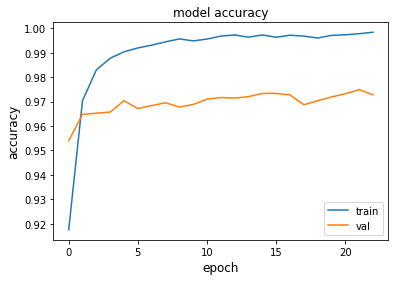

In [28]:
metric = "accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()